
# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
# ! pip install --quiet vietocr==0.3.2

In [ ]:
# ! pip íntall einops

# Inference

In [28]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [29]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [30]:
# config['weights'] = './weights/model.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False

In [31]:
detector = Predictor(config)

File exists: /Users/macintoshhd/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


In [32]:
# ! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
# ! unzip  -qq -o sample.zip

In [33]:
# ! ls sample | shuf |head -n 5

'24 A Hoãng Niệt, Phương 4, Quân Tân Bình, Tr Hồ Chí Minh'

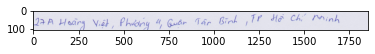

In [38]:
img = './sample/test.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# TRAIN

In [1]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

In [16]:
dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':1,
         'valid_every':15*200,
          'iters':20000,
#           'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
#           'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'

In [10]:
dataset_params = {
    'name':'hw',
    'data_root':'./mydata/',
    'train_annotation':'train_text.txt',
    'valid_annotation':'test_text.txt'
}

params = {
         'print_every':5,
         'valid_every': 5,
          'iters': 50,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 25
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'

In [17]:
config['dataloader'] ={'num_workers':0, 'pin_memory': True}

In [18]:
# config['cnn'] = {'pretrained': False,
#   'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
#   'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
#   'hidden': 256}

In [19]:
# config

In [20]:
trainer = Trainer(config, pretrained=True)

Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth
train_hw exists. Remove folder if you want to create new dataset


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
# trainer.visualize_dataset()

In [ ]:
# trainer.config.save('config.yml')

In [ ]:
# trainer.visualize_dataset()

In [ ]:
trainer.train()

In [ ]:
trainer

In [ ]:
trainer.save_weights('weights/model1.pth')